In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss

In [3]:
df = pd.read_excel('UCL_playerstats_orig.xlsx')

In [4]:
df.head()

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Balls_recovered,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP
0,1,Theo Hernandez,Defender,27,France,Milan,Serie A,Knockout_phase,D,40.0,...,53,2,5,0,0,0,0,861,10,0
1,2,Nicolo Barella,Midfielder,28,Italy,Inter,Serie A,Final,S,80.0,...,32,8,15,0,0,0,2,994,13,2
2,3,Lewandowski,Forward,36,Poland,Barcelona,La Liga,Semi_finals,A,15.0,...,11,4,1,0,0,0,2,985,13,1
3,4,Raphinha,Forward,28,Brazil,Barcelona,La Liga,Semi_finals,A,80.0,...,18,2,7,0,0,0,3,1225,14,0
4,5,Van Dijk,Defender,33,Netherlands,Liverpool FC,Premier League,Round16,C,50.0,...,51,3,3,0,0,0,0,840,9,1


In [5]:
df.drop(['PlayerID'],axis=1,inplace=True)

In [6]:
df.Goals.value_counts()

Goals
0     82
1     45
2     25
3     22
4     13
5      6
6      5
7      4
8      3
11     2
13     2
9      1
Name: count, dtype: int64

In [7]:
df.Team.value_counts()

Team
Inter               13
Barcelona           12
Arsenal FC          12
Paris SG            12
Real Madrid         11
BVB Dortmund        11
PSV Eindhoven       10
Bayern Munich       10
Liverpool FC        10
Benfica              9
Atalanta BC          9
Aston Villa          8
Atletico Madrid      8
Bayer Leverkusen     7
Milan                7
Monaco               7
Manchester City      7
Celtic               6
Lille                6
Sporting CP          6
Club Brugge          5
Juventus             5
Feyenoord            4
Bologna              4
Shakhtar Donetsk     3
Brest                2
VfB Stuttgart        2
Sturm Graz           1
Leipzig              1
Dinamo Zagreb        1
Girona               1
Name: count, dtype: int64

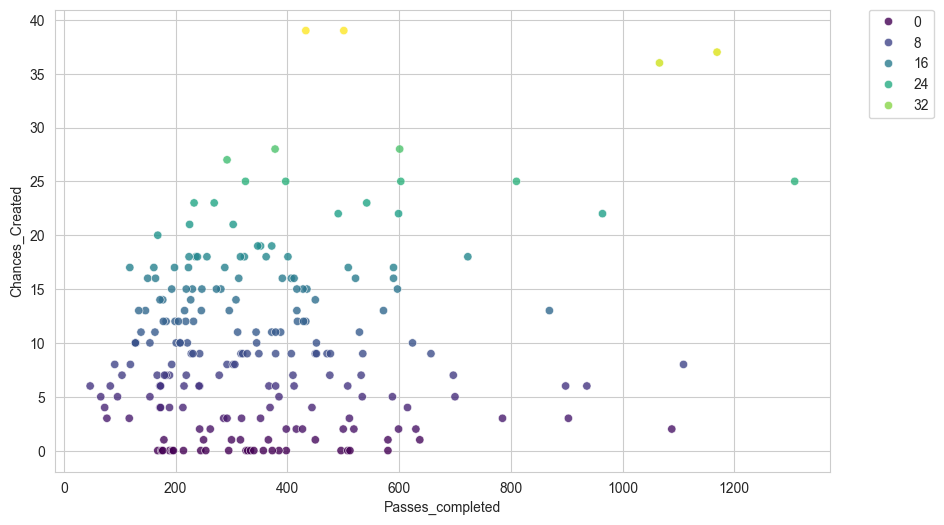

In [8]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df,x='Passes_completed',y='Chances_Created',hue='Chances_Created',alpha=0.8, palette='viridis')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [9]:
df.columns

Index(['Player', 'Position', 'Age', 'Nationality', 'Team', 'Competitions',
       'Phase', 'Phase_Tier', 'Value10^6', 'Jersey_Num', 'Rating', 'Goals',
       'Assists', 'TopSpeed(km/h)', 'DistanceCovered(km)', 'Total_attempts',
       'Dribbles', 'Passes_completed', 'Chances_Created', 'Balls_recovered',
       'Tackles_Won', 'Tackles_Lost', 'Saves', 'Goals_Conceded',
       'Clean_Sheets', 'MOTM_Awards', 'Minutes_played', 'Match_played', 'DNP'],
      dtype='object')

In [10]:
print(df.isnull().sum())

Player                 0
Position               0
Age                    0
Nationality            0
Team                   0
Competitions           0
Phase                  0
Phase_Tier             0
Value10^6              0
Jersey_Num             0
Rating                 0
Goals                  0
Assists                0
TopSpeed(km/h)         0
DistanceCovered(km)    0
Total_attempts         0
Dribbles               0
Passes_completed       0
Chances_Created        0
Balls_recovered        0
Tackles_Won            0
Tackles_Lost           0
Saves                  0
Goals_Conceded         0
Clean_Sheets           0
MOTM_Awards            0
Minutes_played         0
Match_played           0
DNP                    0
dtype: int64


In [11]:
df.dtypes

Player                  object
Position                object
Age                      int64
Nationality             object
Team                    object
Competitions            object
Phase                   object
Phase_Tier              object
Value10^6              float64
Jersey_Num               int64
Rating                 float64
Goals                    int64
Assists                  int64
TopSpeed(km/h)         float64
DistanceCovered(km)    float64
Total_attempts           int64
Dribbles                 int64
Passes_completed         int64
Chances_Created          int64
Balls_recovered          int64
Tackles_Won              int64
Tackles_Lost             int64
Saves                    int64
Goals_Conceded           int64
Clean_Sheets             int64
MOTM_Awards              int64
Minutes_played           int64
Match_played             int64
DNP                      int64
dtype: object

In [12]:
df['Passes_completed'].describe().round(1)

count     210.0
mean      364.2
std       216.6
min        47.0
25%       209.2
50%       319.0
75%       450.0
max      1308.0
Name: Passes_completed, dtype: float64

In [13]:
df.Team.value_counts()

Team
Inter               13
Barcelona           12
Arsenal FC          12
Paris SG            12
Real Madrid         11
BVB Dortmund        11
PSV Eindhoven       10
Bayern Munich       10
Liverpool FC        10
Benfica              9
Atalanta BC          9
Aston Villa          8
Atletico Madrid      8
Bayer Leverkusen     7
Milan                7
Monaco               7
Manchester City      7
Celtic               6
Lille                6
Sporting CP          6
Club Brugge          5
Juventus             5
Feyenoord            4
Bologna              4
Shakhtar Donetsk     3
Brest                2
VfB Stuttgart        2
Sturm Graz           1
Leipzig              1
Dinamo Zagreb        1
Girona               1
Name: count, dtype: int64

In [14]:
df_dummies = df = pd.get_dummies(df, columns=['Phase','Phase_Tier'])

In [15]:
df_dummies['Phase_Final'].value_counts()

Phase_Final
False    185
True      25
Name: count, dtype: int64

In [16]:
df_dummies.columns

Index(['Player', 'Position', 'Age', 'Nationality', 'Team', 'Competitions',
       'Value10^6', 'Jersey_Num', 'Rating', 'Goals', 'Assists',
       'TopSpeed(km/h)', 'DistanceCovered(km)', 'Total_attempts', 'Dribbles',
       'Passes_completed', 'Chances_Created', 'Balls_recovered', 'Tackles_Won',
       'Tackles_Lost', 'Saves', 'Goals_Conceded', 'Clean_Sheets',
       'MOTM_Awards', 'Minutes_played', 'Match_played', 'DNP', 'Phase_Final',
       'Phase_Knockout_phase', 'Phase_League_phase', 'Phase_Quarter_finals',
       'Phase_Round16', 'Phase_Semi_finals', 'Phase_Tier_A', 'Phase_Tier_B',
       'Phase_Tier_C', 'Phase_Tier_D', 'Phase_Tier_E', 'Phase_Tier_S'],
      dtype='object')

In [17]:
df_dummies['Phase_Final'].value_counts()

Phase_Final
False    185
True      25
Name: count, dtype: int64

In [18]:
df_final = df_dummies[df_dummies['Phase_Final']== 1 ]

In [19]:
finalist_teams = df_final['Team'].value_counts()


In [20]:
# how to rename the count column
finalist_teams.rename('Players Number')

Team
Inter       13
Paris SG    12
Name: Players Number, dtype: int64

In [21]:
df_dummies.columns

Index(['Player', 'Position', 'Age', 'Nationality', 'Team', 'Competitions',
       'Value10^6', 'Jersey_Num', 'Rating', 'Goals', 'Assists',
       'TopSpeed(km/h)', 'DistanceCovered(km)', 'Total_attempts', 'Dribbles',
       'Passes_completed', 'Chances_Created', 'Balls_recovered', 'Tackles_Won',
       'Tackles_Lost', 'Saves', 'Goals_Conceded', 'Clean_Sheets',
       'MOTM_Awards', 'Minutes_played', 'Match_played', 'DNP', 'Phase_Final',
       'Phase_Knockout_phase', 'Phase_League_phase', 'Phase_Quarter_finals',
       'Phase_Round16', 'Phase_Semi_finals', 'Phase_Tier_A', 'Phase_Tier_B',
       'Phase_Tier_C', 'Phase_Tier_D', 'Phase_Tier_E', 'Phase_Tier_S'],
      dtype='object')

In [22]:
df_league = df_dummies[df_dummies['Phase_League_phase']== 1]

In [23]:
league_teams = df_league['Team'].value_counts()

In [24]:
print(league_teams.rename('Players Number'))
print(league_teams.rename('Players Number').sum())

Team
Bologna             4
Shakhtar Donetsk    3
VfB Stuttgart       2
Sturm Graz          1
Leipzig             1
Dinamo Zagreb       1
Girona              1
Name: Players Number, dtype: int64
13


In [25]:
liverpoolfc = df.loc[df['Team'] == 'Liverpool FC']

In [26]:
astonvilla = df.loc[df['Team'] == 'Aston Villa']

In [27]:
astonvilla[['Player','Team','Age','Value10^6']].sort_values(by='Value10^6',ascending=False)

,Player,Team,Age,Value10^6
166,Marcus Rashford,Aston Villa,27,50.0
188,Rogers,Aston Villa,22,50.0
57,Ezri Konsa,Aston Villa,27,35.0
135,Youri Tielemans,Aston Villa,27,35.0
91,Jacob Ramsey,Aston Villa,23,32.0
92,Maatsen,Aston Villa,23,28.0
32,John McGinn,Aston Villa,30,26.0
160,Emiliano Martinez,Aston Villa,30,25.0


In [28]:
liverpoolfc[['Player','Team','Age','Value10^6']].sort_values(by='Value10^6',ascending=False)

,Player,Team,Age,Value10^6
194,Luis Diaz,Liverpool FC,28,85.0
31,Szoboszlai,Liverpool FC,24,80.0
174,Mac Allister,Liverpool FC,26,70.0
73,Gakpo,Liverpool FC,26,70.0
195,Ibrahima Konate,Liverpool FC,25,60.0
130,Salah,Liverpool FC,32,55.0
4,Van Dijk,Liverpool FC,33,50.0
52,Alisson Becker,Liverpool FC,32,35.0
199,Gravenberch,Liverpool FC,22,30.0
152,Robertson,Liverpool FC,31,20.0


In [29]:
psv = df.loc[df['Team'] == 'PSV Eindhoven']

In [30]:
psv[['Player','Team','Age','Value10^6']].sort_values(by='Value10^6',ascending=False)

,Player,Team,Age,Value10^6
13,Johan Bakayoko,PSV Eindhoven,22,35.0
155,Tillman,PSV Eindhoven,22,30.0
22,Joey Veerman,PSV Eindhoven,26,28.0
34,Noa Lang,PSV Eindhoven,25,25.0
168,Boscagli,PSV Eindhoven,27,23.0
123,Ismael Saibari,PSV Eindhoven,24,23.0
43,Ryan Flamingo,PSV Eindhoven,22,16.0
35,Mauro Junior,PSV Eindhoven,26,12.0
137,Luuk de Jong,PSV Eindhoven,34,3.0
200,Ivan Perisic,PSV Eindhoven,36,1.0


In [31]:
rating_player = df.loc[df['Rating'] > 7.70]

In [32]:
rating_player[['Player','Age','Team','Goals','Assists','Rating','DistanceCovered(km)','Total_attempts','Chances_Created','Dribbles','Match_played']]

,Player,Age,Team,Goals,Assists,Rating,DistanceCovered(km),Total_attempts,Chances_Created,Dribbles,Match_played
3,Raphinha,28,Barcelona,13,9,8.31,126.8,52,39,24,14
12,Hakimi,26,Paris SG,4,5,7.87,176.8,36,36,37,17
15,Yamal,17,Barcelona,5,3,7.92,101.3,52,16,109,13
37,Vinicius Jr,24,Real Madrid,8,3,7.79,118.9,42,23,82,12
47,Griezmann,34,Atletico Madrid,6,3,7.85,89.6,19,11,6,10
75,Dembele,27,Paris SG,8,6,7.91,126.1,64,39,62,15
129,Nuno Mendes,22,Paris SG,4,2,7.74,145.4,15,13,27,16
134,Guirassy,29,BVB Dortmund,13,4,7.80,92.6,40,12,11,14
144,Harry Kane,31,Bayern Munich,11,2,7.87,139.7,49,23,13,13
155,Tillman,22,PSV Eindhoven,3,2,7.75,68.5,11,21,10,6


In [33]:
player_number_10 = df.loc[df['Jersey_Num'] == 10]
player_number_10

,Player,Position,Age,Nationality,Team,Competitions,Value10^6,Jersey_Num,Rating,Goals,...,Phase_League_phase,Phase_Quarter_finals,Phase_Round16,Phase_Semi_finals,Phase_Tier_A,Phase_Tier_B,Phase_Tier_C,Phase_Tier_D,Phase_Tier_E,Phase_Tier_S
26,Kuhn,Forward,25,Germany,Celtic,Premiership,12.0,10,7.33,3,...,False,False,False,False,False,False,False,True,False,False
34,Noa Lang,Forward,25,Netherlands,PSV Eindhoven,Eredivisie,25.0,10,7.15,2,...,False,False,True,False,False,False,True,False,False,False
60,Lautaro Martinez,Forward,27,Argentina,Inter,Serie A,100.0,10,7.42,9,...,False,False,False,False,False,False,False,False,False,True
64,Otar Kiteishvili,Midfielder,29,Georgia,Sturm Graz,ABundesliga,5.0,10,7.06,1,...,True,False,False,False,False,False,False,False,True,False
70,Modric,Midfielder,39,Croatia,Real Madrid,La Liga,5.0,10,7.16,0,...,False,True,False,False,False,True,False,False,False,False
75,Dembele,Forward,27,France,Paris SG,Ligue 1,75.0,10,7.91,8,...,False,False,False,False,False,False,False,False,False,True
84,Rafael Leao,Forward,25,Portugal,Milan,Serie A,75.0,10,7.22,3,...,False,False,False,False,False,False,False,True,False,False
90,Kenan Yildiz,Forward,20,Turkey,Juventus,Serie A,45.0,10,6.97,1,...,False,False,False,False,False,False,False,True,False,False
106,Orkun Kökcü,Midfielder,24,Turkey,Benfica,Liga Portugal,28.0,10,7.27,4,...,False,False,True,False,False,False,True,False,False,False
143,Georgiy Sudakov,Midfielder,22,Ukraine,Shakhtar Donetsk,Premier Liga,32.0,10,7.02,2,...,True,False,False,False,False,False,False,False,True,False


In [34]:
barcelonatarget_player = df.iloc[[84,194,166],:]

In [35]:
barcelonatarget_player[['Player','Team','Age','Value10^6','Rating','Match_played','Minutes_played','DistanceCovered(km)']].sort_values(by='Value10^6',ascending=False)

,Player,Team,Age,Value10^6,Rating,Match_played,Minutes_played,DistanceCovered(km)
194,Luis Diaz,Liverpool FC,28,85.0,7.28,9,633,82.1
84,Rafael Leao,Milan,25,75.0,7.22,10,797,84.9
166,Marcus Rashford,Aston Villa,27,50.0,7.16,4,309,35.3


In [36]:
spain_players = []

In [37]:
england_players = []

In [38]:
france_players = []

In [39]:
for x in range(len(df.Nationality)):
    if df.Nationality[x] == 'Spain':
        if df.Nationality[x] == 'Spain':
           spain_players.append({
            'Player': df.Player[x],
            'Team': df.Team[x],
            'Competitions': df.Competitions[x]
        })




In [40]:
for x in range(len(df.Nationality)):
    if df.Nationality[x] == 'France':
        if df.Nationality[x] == 'France':
           france_players.append({
            'Player': df.Player[x],
            'Team': df.Team[x],
            'Competitions': df.Competitions[x]
        })

In [41]:
for x in range(len(df.Nationality)):
    if df.Nationality[x] == 'France':
        if df.Nationality[x] == 'France':
           france_players.append({
            'Player': df.Player[x],
            'Team': df.Team[x],
            'Competitions': df.Competitions[x]
        })

In [42]:
df_france = pd.DataFrame(france_players)

df_france

,Player,Team,Competitions
0,Theo Hernandez,Milan,Serie A
1,Chevalier,Lille,Ligue 1
2,Kylian Mbappe,Real Madrid,La Liga
3,Kounde,Barcelona,La Liga
4,Mike Maignan,Milan,Serie A
5,Griezmann,Atletico Madrid,La Liga
6,Saliba,Arsenal FC,Premier League
7,Pavard,Inter,Serie A
8,Dembele,Paris SG,Ligue 1
9,Barcola,Paris SG,Ligue 1


In [43]:
df_england = pd.DataFrame(england_players)

df_england

""


In [44]:
df_spain = pd.DataFrame(spain_players)


In [45]:
df_spain

,Player,Team,Competitions
0,Yamal,Barcelona,La Liga
1,Fabian Ruiz,Paris SG,Ligue 1
2,Raul Asencio,Real Madrid,La Liga
3,Grimaldo,Bayer Leverkusen,Bundesliga
4,Pedri,Barcelona,La Liga
5,David Raya,Arsenal FC,Premier League
6,Inigo Martinez,Barcelona,La Liga
7,Dani Olmo,Barcelona,La Liga
8,Alvaro Carreras,Benfica,Liga Portugal
9,Mikel Merino,Arsenal FC,Premier League
